In [3]:
import spacy
import nltk
import gensim
from gensim import corpora
from spacy.lang.en import English
from nltk.corpus import wordnet as wn
import numpy as np
import time
from nltk.stem.wordnet import WordNetLemmatizer
from contextlib import contextmanager
import random
import csv
import pandas as pd
import json

In [47]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    ax = sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
    
    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
        
    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [48]:
@contextmanager
def timer(msg):
    t0 = time.time()
    print(f'[{msg}] start.')
    yield
    elapsed_time = time.time() - t0
    print(f'[{msg}] done in {elapsed_time / 60:.2f} min.')

In [49]:
data = pd.read_csv('cleaned_short.csv')

In [4]:
data.head()

,target,comment_text
0,0.4400,this is a great story man i wonder i...
1,0.9125,yet call out all muslims for the acts of a few...
2,0.0000,because the people who drive cars more are the...
3,0.3000,mormons have had a complicated relationship wi...
4,0.0000,i am doing the same thing


In [5]:
with open('preprocess_trigram_token.csv','r') as infile:
    text_data = json.load(infile)

In [6]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [8]:
with timer('LDA'):
    NUM_TOPICS = 30
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10, random_state=0)
#     ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics()

[LDA] start.
[LDA] done in 21.03 min.


In [9]:
with timer('corpus'):
    lda_corpus = ldamodel[corpus]
    lda_corpus

[corpus] start.
[corpus] done in 0.00 min.


In [10]:
with timer('lda_docs'):
    lda_docs = [doc for doc in lda_corpus]

[lda_docs] start.
[lda_docs] done in 1.13 min.


In [11]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [12]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.238997  0.019798       1        1   6.132159
1     -0.109509  0.083409       2        1   1.655246
2     -0.140246  0.029174       3        1   1.235424
3      0.018966 -0.133149       4        1   2.597398
4     -0.127395  0.064208       5        1   1.370595
5     -0.008366 -0.110144       6        1   2.498114
6     -0.065875 -0.246067       7        1   2.037990
7     -0.031582  0.032958       8        1   2.371297
8     -0.123679  0.007684       9        1   1.576212
9      0.187115 -0.016725      10        1   3.962324
10    -0.132428  0.028738      11        1   1.402314
11    -0.058647 -0.207051      12        1   2.279282
12    -0.129914  0.034037      13        1   1.549150
13     0.009234 -0.180115      14        1   2.427158
14     0.322635  0.028762      15        1   9.183725
15    -0.105086  0.092118      16        1   1.488593
16    -0.134640  0.043831      17        1   1.255222
17     0.329980 -0.004866      18        1  15.758480
18     0.344488  0.084288      19        1  12.565192
19    -0.132695  0.061993      20        1   1.257065
20     0.235956  0.024305      21        1   5.939897
21    -0.046303  0.049896      22        1   2.339350
22    -0.000153 -0.124409      23        1   2.630020
23     0.164770  0.156982      24        1   3.393517
24    -0.125926  0.049459      25        1   1.518796
25    -0.125524  0.039814      26        1   1.539850
26     0.123040 -0.061030      27        1   3.629447
27    -0.138497  0.020936      28        1   1.237217
28    -0.114173  0.067014      29        1   1.639602
29    -0.124542  0.064153      30        1   1.529370, topic_info=     Category          Freq      Term         Total  loglift  logprob
232   Default  44143.000000     woman  44143.000000  30.0000  30.0000
3909  Default  26064.000000     trump  26064.000000  29.0000  29.0000
118   Default  18679.000000       god  18679.000000  28.0000  28.0000
357   Default  26798.000000     right  26798.000000  27.0000  27.0000
377   Default  16020.000000       men  16020.000000  26.0000  26.0000
...       ...           ...       ...           ...      ...      ...
1253  Topic30   1133.665283      food   1577.357910   3.8500  -4.4056
72    Topic30   1779.677612     house   3396.439941   3.5340  -3.9546
869   Topic30    887.225159  activity   1076.548950   3.9869  -4.6507
1794  Topic30    730.726074   quality    962.071228   3.9053  -4.8447
99    Topic30    909.987610     state  15832.314453   1.3239  -4.6253

[1411 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4401      6  0.998818     abandon
4318     23  0.999784    abortion
5451      5  0.379617  absolutely
5451      8  0.139526  absolutely
5451     18  0.374351  absolutely
...     ...       ...         ...
307      22  0.037145         yes
307      27  0.056148         yes
317      12  0.997251     younger
2999     13  0.997962       youth
1872     13  0.998680        zero

[2334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [13]:
import numpy as np
matrix = pd.DataFrame(np.zeros((235087,30)))

In [14]:
for idx, doc in enumerate(lda_docs):
    for doc_tuple in doc:
        col_num = doc_tuple[0]
        score = doc_tuple[1]
        matrix.loc[idx, col_num] = score

In [15]:
data['y'] = np.where(data.target > 0.5, 1, 0)
data.y.value_counts(normalize=True)%100

0    0.925959
1    0.074041
Name: y, dtype: float64

In [31]:
lda_data = pd.concat([data.y, data.comment_text, matrix], axis=1)

In [32]:
lda_data.to_csv('doc_topic30.csv', index=False)

In [3]:
lda_data = pd.read_csv('doc_topic30.csv')

In [4]:
lda_data = lda_data.set_index('comment_text')

In [5]:
x = lda_data.iloc[:,1:]
y = lda_data.iloc[:, 0]

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import roc_curve, auc
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/Users/kelvin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kelvin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kelvin/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kelvin/anaconda3/lib/python3.7/site-packages/t

In [7]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
x_balance, y_balance = RandomOverSampler().fit_sample(x_train, y_train)
x_balance = pd.DataFrame(x_balance, columns=x_train.columns)

In [9]:
lr.fit(x_balance, y_balance)
y_pred = lr.predict(x_test)

/Users/kelvin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


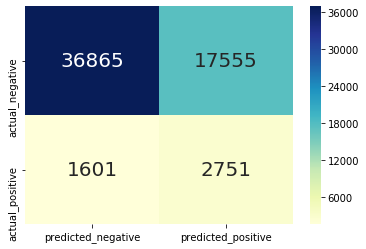

In [11]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred)

,LogReg_TFIDF,NB_TFIDF
Accuracy,0.674,0.578
Precision,0.135,0.111
Recall,0.632,0.668
F1 Score,0.222,0.190


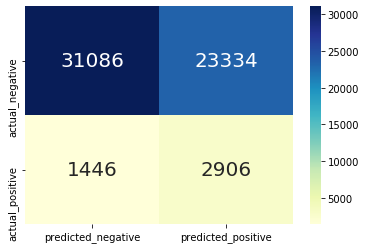

In [13]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_balance, y_balance)
y_pred_nb = bnb.predict(x_test)

# Here's the heat map for the first Naive Bayes model
cm2 = conf_matrix(y_test, y_pred_nb)

[timer] start.


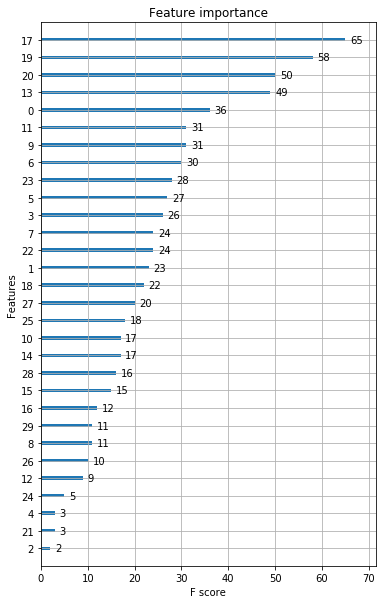

ROC_AUC:  0.6585209231845991
[[37886 16534]
 [ 1650  2702]]
[timer] done in 1.42 min.


In [14]:
with timer('timer'):
    model = XGBClassifier()
    model.fit(x_balance, y_balance)
    # plot feature importance
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(6, 10)
    pyplot.show()
    predict = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC: ", roc_auc)
    print(confusion_matrix(y_test, predict))

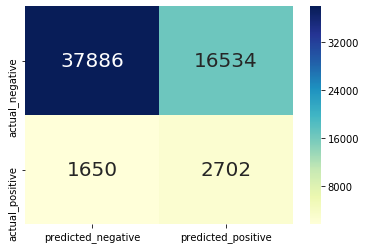

In [15]:
cm3 = conf_matrix(y_test, predict)

In [16]:
results = pd.DataFrame(list(zip(cm1, cm2, cm3)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg_LDA', 'NB_LDA', 'XBG_LDA']
results

,LogReg_CountVec,NB_CountVec,XBG_CountVec
Accuracy,0.674,0.578,0.691
Precision,0.135,0.111,0.140
Recall,0.632,0.668,0.621
F1 Score,0.222,0.190,0.228


In [53]:
data = pd.read_csv('short_data.csv')